In [206]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [207]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Importing the dataset

In [208]:
df = pd.read_csv('heart.csv')

In [209]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Wrangling

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [211]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [212]:
df.duplicated().count()

918

In [213]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [214]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [215]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [216]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [217]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [218]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [219]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [220]:
df_dummies= pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
df_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0.0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
7,54,110,208,0,142,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
8,37,140,207,0,130,1.5,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
9,48,120,284,0,120,0.0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1


<AxesSubplot:>

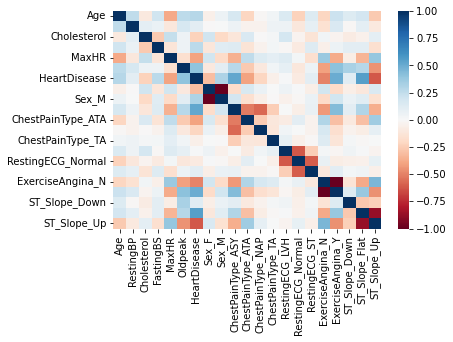

In [221]:
sns.heatmap(df_dummies.corr(),cmap='RdBu', fmt='.1f', vmin =-1, vmax=1)

In [222]:
df_dummies.drop(['Sex_F', 'ChestPainType_ASY', 'RestingECG_LVH', 'ExerciseAngina_N',  'ST_Slope_Down' ], axis =1, inplace=True)

In [223]:
df_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [224]:
Y= df_dummies['HeartDisease']


In [225]:
df_dummies.shape

(918, 16)

In [226]:
df_dummies.drop(['HeartDisease'], axis =1, inplace = True)

In [227]:
df_dummies.shape

(918, 15)

## Feature Scaling

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled= scaler.fit_transform(df_dummies)

In [279]:
df_scaled1 = pd.DataFrame(df_scaled, columns = df_dummies.columns)

In [280]:
df_scaled1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [281]:
df_scaled1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## Train_Test Split

In [282]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(df_scaled1,Y, test_size= 0.3, random_state=4)

In [283]:
x_train.shape ,y_train.shape, x_test.shape, y_test.shape

((642, 15), (642,), (276, 15), (276,))

## Modeling

In [284]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [285]:
model.fit(x_train, y_train)

LogisticRegression()

In [286]:
pred=model.predict(x_test)
#pred.reshape(-1,1)
#pred = pd.DataFrame(pred)
#pred.drop(columns = pred.columns[0], axis = 1, inplace= True)
pred.shape

(276,)

In [287]:
#y_test= y_test.values.flatten()
y_test.shape

(276,)

In [288]:
y_test.shape

(276,)

In [289]:
score = roc_auc_score(y_test, pred)
score

0.8836570945945945

In [290]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [291]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [292]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(df_scaled1, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.828908,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.812545,{'n_estimators': 10}
2,logistic_regression,0.831100,{'C': 5}
3,naive_bayes_gaussian,0.837610,{}
4,naive_bayes_multinomial,0.832098,{}
5,decision_tree,0.734046,{'criterion': 'entropy'}


In [293]:
model_params = {
         svm.SVC(gamma='auto'),
         RandomForestClassifier(),
         LogisticRegression(solver='liblinear',multi_class='auto'),
         GaussianNB(),
         MultinomialNB(),
         DecisionTreeClassifier()}

In [294]:
scores = []
for model in model_params:
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    score = roc_auc_score(y_test, pred)
    scores.append(score)
scores
   



[0.8383657094594594,
 0.761402027027027,
 0.8779560810810811,
 0.894847972972973,
 0.8797508445945945,
 0.8763724662162162]

In [295]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_scaled1, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.863123 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863123 (0.036415) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863123 (0.036415) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863123 (0.035980) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.861674 (0.036129) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.861674 (0.036129) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.862036 (0.036261) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.862410 (0.038776) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.862410 (0.038776) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.862773 (0.038279) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.861670 (0.034741) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.861670 (0.034741) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860941 (0.036133) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.840966 (0.034132) wit

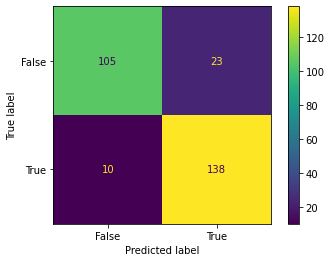

In [296]:
# Creates a confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor'], 
                     columns = ['setosa','versicolor'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()


In [297]:
from catboost import CatBoostRegressor, Pool



#CatBoost

import time

start = time.time()

pool_train = Pool(x_train, y_train)

pool_test = Pool(x_test)

cbr = CatBoostRegressor(iterations=100,max_depth=2)

cbr.fit(pool_train)
y_pred = cbr.predict(x_test)

from sklearn.metrics import r2_score as RSquared


#cb_rsquared = np.sqrt(RSquared(y_test, y_pred))
cb_rsquared= roc_auc_score(y_test, y_pred)
print("R Squared for CatBoost: ", np.mean(cb_rsquared))

end = time.time()
diff = end - start
print('Execution time:', diff)

Learning rate set to 0.248182
0:	learn: 0.4528131	total: 724us	remaining: 71.7ms
1:	learn: 0.4219184	total: 1.45ms	remaining: 71.1ms
2:	learn: 0.3981876	total: 2.17ms	remaining: 70ms
3:	learn: 0.3873497	total: 2.67ms	remaining: 64.1ms
4:	learn: 0.3799399	total: 3.18ms	remaining: 60.5ms
5:	learn: 0.3705995	total: 3.68ms	remaining: 57.7ms
6:	learn: 0.3617031	total: 4.19ms	remaining: 55.7ms
7:	learn: 0.3583893	total: 4.66ms	remaining: 53.6ms
8:	learn: 0.3530387	total: 5.47ms	remaining: 55.3ms
9:	learn: 0.3445800	total: 5.98ms	remaining: 53.8ms
10:	learn: 0.3420775	total: 6.34ms	remaining: 51.3ms
11:	learn: 0.3389133	total: 6.82ms	remaining: 50ms
12:	learn: 0.3352208	total: 7.29ms	remaining: 48.8ms
13:	learn: 0.3321631	total: 7.74ms	remaining: 47.6ms
14:	learn: 0.3301961	total: 8.27ms	remaining: 46.9ms
15:	learn: 0.3289201	total: 8.76ms	remaining: 46ms
16:	learn: 0.3272873	total: 9.28ms	remaining: 45.3ms
17:	learn: 0.3266614	total: 9.75ms	remaining: 44.4ms
18:	learn: 0.3255495	total: 10.2m

Now, let's check for feature importance

In [298]:
cbr.feature_importances_

array([ 2.98705734,  3.40317115, 11.89491942,  1.90787999,  5.22766048,
        5.73927315,  4.17613146,  5.10226781,  5.81141711,  0.72754678,
        0.        ,  0.        ,  4.9878998 , 25.17976119, 22.85501433])

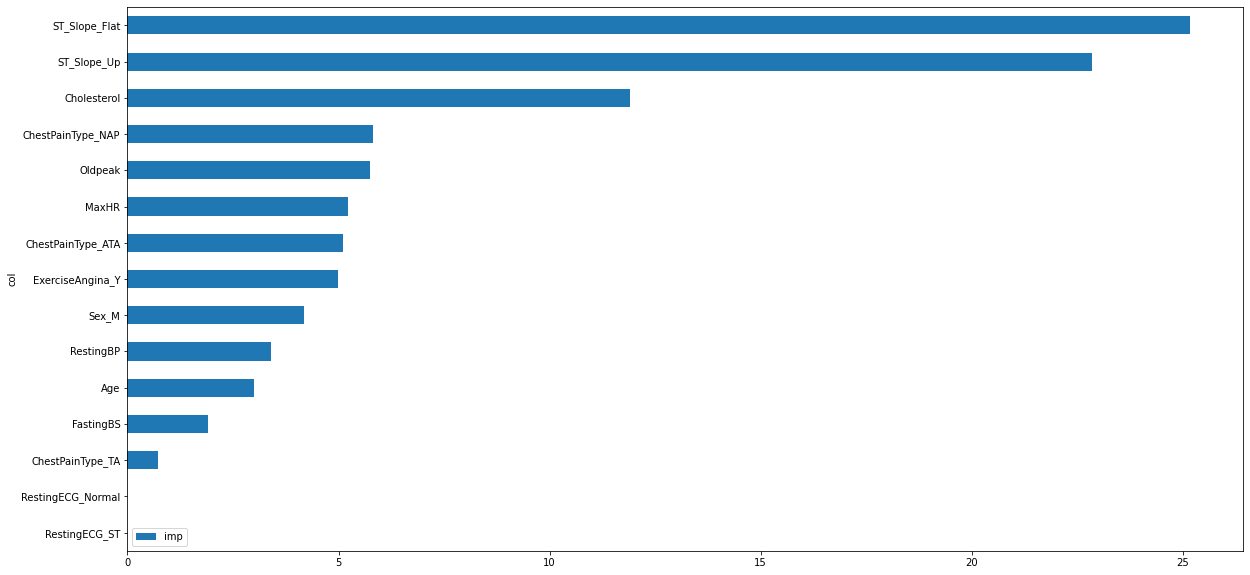

In [299]:
fea_imp = pd.DataFrame({'imp':cbr.feature_importances_, 'col': df_scaled1.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

In [248]:
#XGBoost
import xgboost as xgb
from sklearn import preprocessing


lbl = preprocessing.LabelEncoder()

start = time.time()
#X_train["Species"].astype("category")
xgbr = xgb.XGBRegressor()

xgbr.fit(x_train, y_train)
y_pred = xgbr.predict(x_test)

xgb_rmse = roc_auc_score(y_test, pred)
print("R Squared for XGBoost: ", np.mean(xgb_rmse))

end = time.time()
diff = end - start
print('Execution time:', diff)

R Squared for XGBoost:  0.7994087837837838
Execution time: 0.15636110305786133


In [249]:
#pip install lightgbm

In [255]:
import lightgbm as lgb


lgbmr = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbmr.fit(x_train, y_train)
y_pred = lgbmr.predict(x_test)

lgbm_rsquared = roc_auc_score(y_test, pred)
print()
print("R squared for LightGBM: ", np.mean(lgbm_rsquared))

end = time.time()
diff = end - start


R squared for LightGBM:  0.7994087837837838


Demensionality Reduction

In [269]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled1)

In [270]:
df_pca = pd.DataFrame(data = X_pca)

In [271]:
df_pca

,0,1
0,1.109151,-0.314354
1,-0.123444,-0.594581
2,0.824231,1.020246
3,-0.653189,-0.630538
4,0.860550,-0.262397
5,0.933022,-0.287833
6,1.238959,-0.319786
7,1.061042,-0.296473
8,-0.759793,-0.632294
9,1.198504,-0.317961


In [310]:
x_train,x_test, y_train, y_test = train_test_split(df_pca,Y, test_size= 0.3, random_state=4)

In [311]:
x_train.shape ,y_train.shape, x_test.shape, y_test.shape

((642, 2), (642,), (276, 2), (276,))

In [312]:

import time

start = time.time()

pool_train = Pool(x_train, y_train)

pool_test = Pool(x_test)

cbr1 = CatBoostRegressor(iterations=100,max_depth=2)

cbr1.fit(pool_train)
y_pred = cbr1.predict(x_test)

from sklearn.metrics import r2_score as RSquared


#cb_rsquared = np.sqrt(RSquared(y_test, y_pred))
cb_rsquared= roc_auc_score(y_test, y_pred)
print("R Squared for CatBoost: ", np.mean(cb_rsquared))

end = time.time()
diff = end - start
print('Execution time:', diff)

Learning rate set to 0.248182
0:	learn: 0.4446785	total: 543us	remaining: 53.8ms
1:	learn: 0.4089716	total: 1.19ms	remaining: 58.5ms
2:	learn: 0.3896849	total: 1.8ms	remaining: 58.1ms
3:	learn: 0.3770322	total: 2.46ms	remaining: 59.1ms
4:	learn: 0.3670128	total: 3.03ms	remaining: 57.6ms
5:	learn: 0.3607853	total: 3.46ms	remaining: 54.2ms
6:	learn: 0.3572343	total: 4.02ms	remaining: 53.4ms
7:	learn: 0.3536719	total: 4.63ms	remaining: 53.2ms
8:	learn: 0.3521348	total: 5.32ms	remaining: 53.8ms
9:	learn: 0.3499395	total: 5.95ms	remaining: 53.6ms
10:	learn: 0.3488498	total: 6.52ms	remaining: 52.8ms
11:	learn: 0.3478635	total: 7.08ms	remaining: 51.9ms
12:	learn: 0.3471103	total: 7.61ms	remaining: 50.9ms
13:	learn: 0.3466005	total: 8.18ms	remaining: 50.2ms
14:	learn: 0.3463536	total: 8.75ms	remaining: 49.6ms
15:	learn: 0.3459554	total: 9.36ms	remaining: 49.1ms
16:	learn: 0.3457849	total: 9.96ms	remaining: 48.6ms
17:	learn: 0.3450515	total: 10.6ms	remaining: 48.2ms
18:	learn: 0.3440237	total: 

In [313]:
cbr1.feature_importances_

array([78.45575996, 21.54424004])

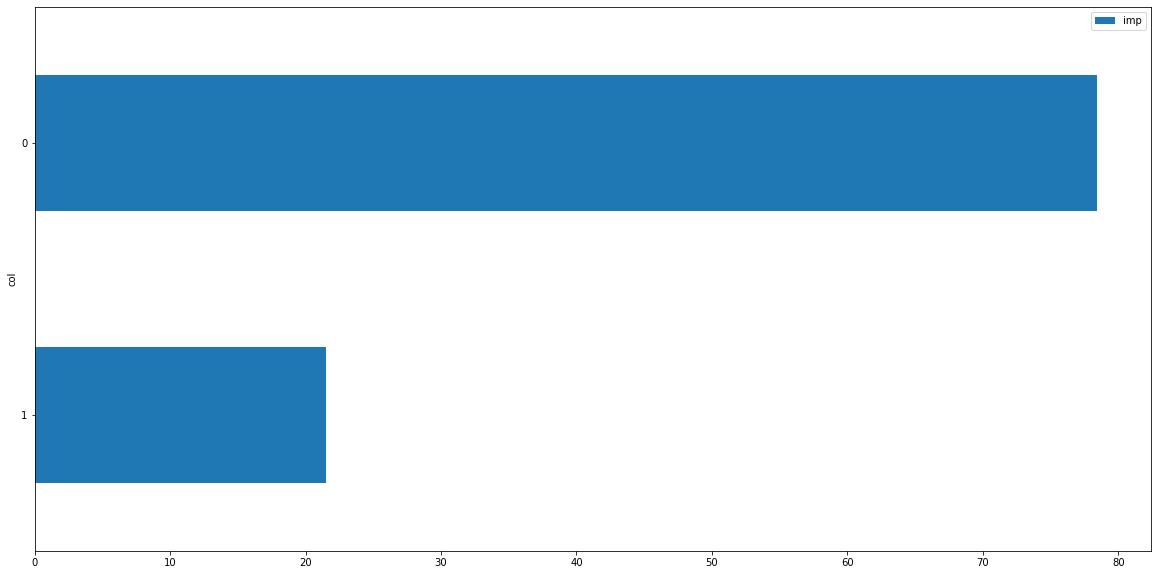

In [315]:
fea_imp = pd.DataFrame({'imp':cbr1.feature_importances_, 'col': df_pca.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

Conclusion:

We have been able to train our model using different algorithm and techniques. It was observed that Catboost has the greatest score compared to other supervised learning algorithm used. Also, slope of the peak exercise ST segment is the feature that had the greatest influence on our model, followed by serum cholesterol and the chest pain type